## Writing a neural net with residual block

In [1]:
import nnabla as nn
import nnabla.parametric_functions as PF
import nnabla.functions as F
from IPython.display import Image
from lenet import lenet_prediction
from utils import variable_as_graphviz as _v

2021-11-15 01:50:46,164 [nnabla][INFO]: Initializing CPU extension...


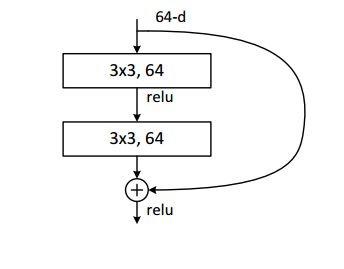

In [2]:
Image('files/residual.png')

### Residual Block
#### conv -> bn -> relu
1. 1st conv of resblock: conv (out ch=32, kernel=(1x1)) ->> bn ->> relu
2. 2nd conv of resblock: conv (out ch=32, kernel=(3x3), pad=(1x1))->> bn ->> relu
3. 3rd conv of resblock: conv (out ch=64, kernel=(1x1))  ->> bn

In [3]:
def bn(x):
    return PF.batch_normalization(x, batch_stat=False)

def res_unit(x, scope):
    with nn.parameter_scope(scope):
        with nn.parameter_scope('conv1'):
            h = PF.convolution(x, 32, kernel=(1,1))
            h = F.relu(bn(h))

        with nn.parameter_scope('conv2'):
            h = PF.convolution(x, 32, kernel=(3,3), pad=(1,1))
            h = F.relu(bn(h))

        with nn.parameter_scope('conv3'):
            h = PF.convolution(x, 64, kernel=(1,1))
            h = bn(h)
    return F.relu(F.add2(h, x, inplace=True))

### overall architecture
1. c1 = conv(out ch  = 64, kernel = (3,3), pad = (3,3), name='conv1') -->> bn -->> relu
2. c2 = resunit( under scope 'conv2') -->> max_pool (kernel= (2,2))
3. c3 = resunit( under scope 'conv3') -->> max_pool (kernel= (2,2))


In [6]:
# Conv1 --> 64 x 32 x 32
nn.clear_parameters()
image = nn.Variable((1,3,224,224))


c1 = PF.convolution(image,64,kernel=(3,3),pad=(3,3), name='conv1')
c1 = F.relu(PF.batch_normalization(c1))
# Conv2 --> 64 x 16 x 16
c2 = res_unit(c2,'conv2')
c2 = F.max_pooling(c2,(2,2))
# Conv3 --> 64 x 8 x 8
c3 = res_unit(c3,'conv3')
c3 = F.max_pooling(c3,(2,2))

pl = F.average_pooling(c3, (4, 4))
with nn.parameter_scope("classifier"):
    y = PF.affine(pl, 10)

In [7]:
print(y.shape)
p = nn.get_parameters()
for k,v in p.items():
    print(k,v.shape)

(1, 10)
conv1/conv/W (64, 3, 3, 3)
conv1/conv/b (64,)
bn/beta (1, 64, 1, 1)
bn/gamma (1, 64, 1, 1)
conv2/conv1/conv/W (32, 64, 1, 1)
conv2/conv1/conv/b (32,)
conv2/conv1/bn/beta (1, 32, 1, 1)
conv2/conv1/bn/gamma (1, 32, 1, 1)
conv2/conv2/conv/W (32, 64, 3, 3)
conv2/conv2/conv/b (32,)
conv2/conv2/bn/beta (1, 32, 1, 1)
conv2/conv2/bn/gamma (1, 32, 1, 1)
conv2/conv3/conv/W (64, 64, 1, 1)
conv2/conv3/conv/b (64,)
conv2/conv3/bn/beta (1, 64, 1, 1)
conv2/conv3/bn/gamma (1, 64, 1, 1)
conv3/conv1/conv/W (32, 64, 1, 1)
conv3/conv1/conv/b (32,)
conv3/conv1/bn/beta (1, 32, 1, 1)
conv3/conv1/bn/gamma (1, 32, 1, 1)
conv3/conv2/conv/W (32, 64, 3, 3)
conv3/conv2/conv/b (32,)
conv3/conv2/bn/beta (1, 32, 1, 1)
conv3/conv2/bn/gamma (1, 32, 1, 1)
conv3/conv3/conv/W (64, 64, 1, 1)
conv3/conv3/conv/b (64,)
conv3/conv3/bn/beta (1, 64, 1, 1)
conv3/conv3/bn/gamma (1, 64, 1, 1)
classifier/affine/W (3136, 10)
classifier/affine/b (10,)


In [132]:
print(y.shape)
p = nn.get_parameters()
for k,v in p.items():
    print(k,v.shape)

(1, 10)
conv1/conv/W (64, 3, 3, 3)
conv1/conv/b (64,)
bn/beta (1, 64, 1, 1)
bn/gamma (1, 64, 1, 1)
conv2/conv1/conv/W (32, 64, 1, 1)
conv2/conv1/conv/b (32,)
conv2/conv1/bn/beta (1, 32, 1, 1)
conv2/conv1/bn/gamma (1, 32, 1, 1)
conv2/conv2/conv/W (32, 32, 3, 3)
conv2/conv2/conv/b (32,)
conv2/conv2/bn/beta (1, 32, 1, 1)
conv2/conv2/bn/gamma (1, 32, 1, 1)
conv2/conv3/conv/W (64, 32, 1, 1)
conv2/conv3/conv/b (64,)
conv2/conv3/bn/beta (1, 64, 1, 1)
conv2/conv3/bn/gamma (1, 64, 1, 1)
conv3/conv1/conv/W (32, 64, 1, 1)
conv3/conv1/conv/b (32,)
conv3/conv1/bn/beta (1, 32, 1, 1)
conv3/conv1/bn/gamma (1, 32, 1, 1)
conv3/conv2/conv/W (32, 32, 3, 3)
conv3/conv2/conv/b (32,)
conv3/conv2/bn/beta (1, 32, 1, 1)
conv3/conv2/bn/gamma (1, 32, 1, 1)
conv3/conv3/conv/W (64, 32, 1, 1)
conv3/conv3/conv/b (64,)
conv3/conv3/bn/beta (1, 64, 1, 1)
conv3/conv3/bn/gamma (1, 64, 1, 1)
classifier/affine/W (3136, 10)
classifier/affine/b (10,)


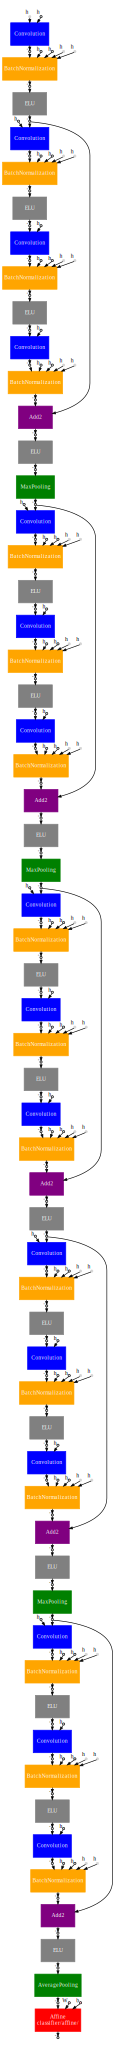

In [133]:
_v(y)

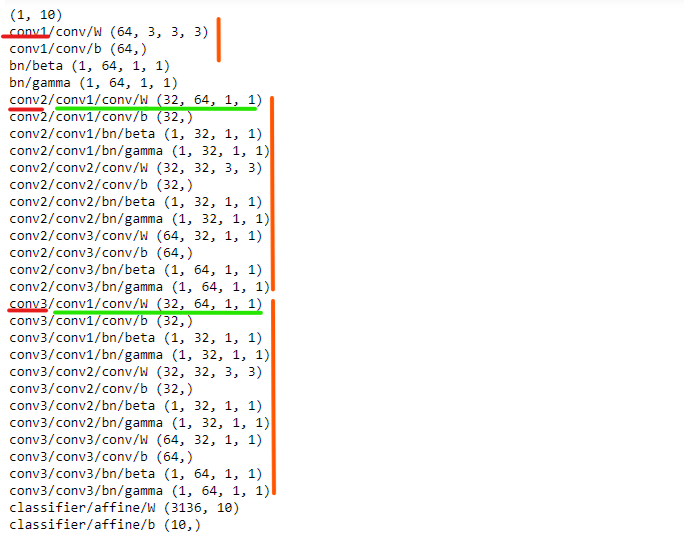

In [9]:
Image('files/resblock.png')